Link do dado:

https://psl.noaa.gov/data/gridded/data.gpcp.html

Arquivo utilizado:

wget https://downloads.psl.noaa.gov/Datasets/gpcp/precip.mon.mean.nc

Ambiente de trabalho: dados

# Abertura do arquivo

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('../dados/NetCDF/precip.mon.mean.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 520, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2022/03 through latest.

# Converte longitude do formato 0° a 180° para -180 a +180°.

In [7]:
# lon é o nome da dimensão do arquivo aberto.
ds['lon'] = ds['lon'].where(ds.lon < 180, ds['lon']-360)
ds_corrigido = ds.sortby(ds['lon'])

In [8]:
ds_corrigido

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 520, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 1979-01-01 1979-02-01 ... 2022-05-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 180.0 182.5 182.5 185.0 ... 177.5 177.5 180.0
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2022/03 through latest.

# Diagrama Hovmöller

1) Para um ano em particular

In [19]:
# Seleção de todos os meses do ano 2021.
selecao = ds.sel(time=slice('2021-01-01', '2021-12-01'))
selecao

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, time: 12, nv: 2)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... -8.75 -6.25 -3.75 -1.25
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 2021-01-01 2021-02-01 ... 2022-01-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2022/03 through latest.

In [25]:
# T = tranpose, isto é, x = time e y = Latitude. Sem o "T" seria invertido.
selecao.precip.mean('lon').T.plot.contourf()

ValueError: Invalid RGBA argument: 'rainbown'

2. Climatologia (média de todos os meses)

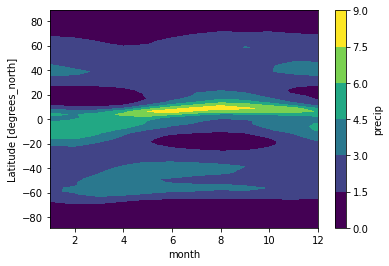

In [15]:
ds.precip.groupby('time.month').mean(dim=('time', 'lon')).T.plot.contourf()